<a href="https://colab.research.google.com/github/elevien/phenotypic_variability_review/blob/main/desert_annuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%config InlineBackend.figure_format = "svg"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In this notebook we recreate Figure 2 (A) using the original data from Venable 2007. 


In [5]:
data = pd.read_csv("http://www.eebweb.arizona.edu/faculty/venable/LTREB/species_x_year.csv",delimiter=",")

In [6]:
data

,species,year,germ,survive,seedlings_per_m2,lx,bx,lxbx,seeds_per_m2,germ fraction
0,dapu,1983,21,14,30.000000,0.67,4,2.67,.,.
1,drcu,1983,0,0,0.000000,.,.,0,.,.
2,erci,1983,50,27,71.430000,0.54,10.37,5.6,.,.
3,erla,1983,49,41,70.000000,0.84,71.22,59.59,.,.
4,erte,1983,14,5,20.000000,0.36,23,8.21,.,.
...,...,...,...,...,...,...,...,...,...,...
475,plin,2014,43,26,7.413793,0.604651163,22.72727273,13.74207188,5.15234585,0.589981786
476,plpa,2014,27,10,4.655172,0.37037037,16.22222222,6.008230453,0,1
477,scba,2014,1282,747,221.034483,0.582683307,49.01036806,28.55752335,314.2930969,0.412895751
478,stmi,2014,28,11,4.827586,0.392857143,29.66857038,11.65550979,141.6895109,0.032948962


In [ ]:
# get a list of all the species in the data set
species = data.species.unique()

def getxy(species):
  """
  This function returns the variation in reproductive success and the 
  fraction of germinating seeds, which will be the x and y coordinate in the plot
  """
  df = data[data.species == species]
  frac = np.array([float(x) if x != "." else 0 for x in df["germ fraction"].values if x != "."])
  S = np.array([float(x) for x in df["bx"].values if x != "."])
  y = np.mean(frac)
  x = np.exp(np.std(np.log(S)))
  return [x,y]

In [ ]:
# now we get the x and y coordinates for all species
x,y = np.array([getxy(s) for s in species]).transpose();

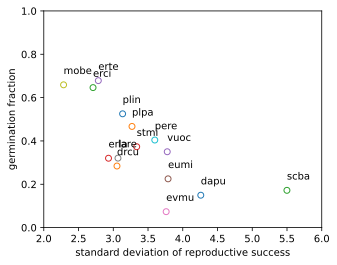

In [ ]:
fig,ax = plt.subplots(figsize=(5,4))
for k in range(len(species)):
  ax.plot(x[k],y[k],'o',fillstyle="none")
  ax.text(x[k],y[k]+0.05,species[k])
ax.set_xlabel("standard deviation of reproductive success")
ax.set_ylabel("germination fraction")
ax.set_ylim(0,1)
ax.set_xlim(2,6);

Now let's perform a linear regression and confirm that there is indeed a statistically signficant correlation. 

In [ ]:
X = sm.add_constant((x - np.mean(x))/np.std(x))
model= sm.OLS((y - np.mean(y))/np.std(y),X) 
results = model.fit()
b_fit,a_fit = results.params

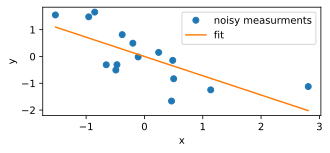

In [ ]:
# now let's plot it and compare to the data
fig,ax = plt.subplots(figsize=(5,2))
ax.plot((x - np.mean(x))/np.std(x),(y - np.mean(y))/np.std(y),"o",label="noisy measurments")
ax.plot((x - np.mean(x))/np.std(x),a_fit*(x - np.mean(x))/np.std(x) + b_fit,"-",label="fit")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [1]:
print(results.summary())

NameError: ignored